In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder , StandardScaler

#Importing required packages.


from sklearn.ensemble         import RandomForestClassifier
from sklearn.svm              import SVC
from sklearn.linear_model     import SGDClassifier
from sklearn.metrics          import confusion_matrix, classification_report
from sklearn.preprocessing    import StandardScaler, LabelEncoder
from sklearn.model_selection  import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree             import DecisionTreeClassifier

In [2]:
data = pd.read_csv('/Users/sundeep/Learnings/1_PGP_DSBA/Project/9_WineQuality/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
bins = (2,6.5,8)
group_names = ['bad','good']
data['quality'] = pd.cut(data['quality'] , bins = bins , labels = group_names)

In [6]:
np.random.seed(1)
data.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,bad
1283,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,bad
408,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,bad
1281,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,bad
1118,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,bad
1143,7.0,0.22,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0,bad
1215,8.8,0.27,0.46,2.1,0.095,20.0,29.0,0.99488,3.26,0.56,11.3,bad
181,8.9,0.61,0.49,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,bad
1186,6.6,0.80,0.03,7.8,0.079,6.0,12.0,0.99630,3.52,0.50,12.2,bad
1252,7.1,0.72,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,bad


In [7]:
data.quality.value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [8]:
data[data['quality'] == 'bad']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [9]:
data[data['quality'] == 'good']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,good
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,good
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,good
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,good
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,good
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,good
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,good


In [10]:
label_en = LabelEncoder()
data['quality'] = label_en.fit_transform(data['quality'])
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

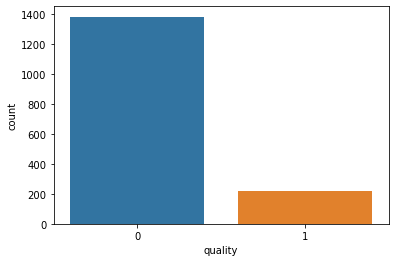

In [11]:
sns.countplot(data['quality']);

In [12]:
X = data.drop('quality' , axis = 1)
y = data['quality']

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

# StandardScaler

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [15]:
print(X_train)

[[-0.65740152  0.25768662 -1.15231874 ...  0.44186892 -0.34498771
  -0.11855775]
 [-0.77212895 -0.13310898 -0.12343809 ... -0.38946413 -0.16509897
  -1.16019036]
 [ 0.31778166 -0.69138842  0.23667013 ...  0.44186892  0.67438185
   0.07083   ]
 ...
 [ 0.37514538 -0.69138842  0.80255449 ... -0.70920761 -0.34498771
   1.68062586]
 [-0.08376435 -1.19383991  0.64822239 ... -0.00577196  0.13471561
   0.73368712]
 [-0.48531037  0.31351456 -0.38065826 ... -1.34869457 -1.36435728
  -1.06549649]]


In [16]:
data[data.isnull().any(axis = 1)].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [17]:
data.isnull().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality
False          False             False        False           False      False                False                 False    False  False      False    False      1599
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.shape

(1599, 12)

# Decision Tree

In [20]:
wine_qual = DecisionTreeClassifier(max_leaf_nodes = 10 , random_state = 3 , criterion = 'entropy')
wine_qual.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=3)

In [21]:
y_pred = wine_qual.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) * 100

87.91666666666667

In [23]:
confusion_matrix(y_test,y_pred)

array([[386,  31],
       [ 27,  36]])

# Random Forest

In [24]:
# Random Forest
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       417
           1       0.85      0.52      0.65        63

    accuracy                           0.93       480
   macro avg       0.89      0.75      0.80       480
weighted avg       0.92      0.93      0.92       480



In [26]:
confusion_matrix(y_test,y_pred_rfc)

array([[411,   6],
       [ 30,  33]])

In [27]:

accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
print(accuracy_rfc)

0.925


In [28]:
ytrain_pred = rfc.predict_proba(X_train)
ytest_pred  = rfc.predict_proba(X_test)

print('RFC Roc Train Curve',roc_auc_score(y_train,ytrain_pred[:,1]))
print('RFC ROC Test Curve',roc_auc_score(y_test,ytest_pred[:,1]))

NameError: name 'roc_auc_score' is not defined

In [ ]:
fpr , tpr , thresholds = roc_curve(y_test , y_pred_rfc)

print(fpr)
print(tpr)
print(thresholds)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(y_pred_rfc>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred_rfc, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
plot_roc_curve(fpr,tpr)

# SVM

In [ ]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train , y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svc))

In [ ]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)
accuracy_svc

In [ ]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(estimator = svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
svc2 = SVC(C = 0.9 , gamma = 1.2 , kernel = 'rbf')
svc2.fit(X_train,y_train)
y_pred_svc2 = svc2.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svc2))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_svc2 = accuracy_score(y_test,y_pred_svc2)
accuracy_svc2

# ROC and AUC Curve